In [1]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# fancy imports
from scipy.optimize import minimize
from linearmodels.iv import IV2SLS
from functools import partial
from scipy.stats import norm

np.random.seed(123)

# Generalized method of moments

## General idea

The generalized method of moments (GMM) is a general estimation principle, where the estimators are derived from so-called moment conditions. It provides a unifying framework for the comparison of alternative estimators.

Structure:
- Setup
- Identification
- Asymptotic distribution
- Testing

## Setup

**Notation:**

- $\beta$ $(p \times 1)$ - parameter vector
- $w_i$ $(i = 1,..., n)$ - data points
- $g_i(w_i, \beta)$ $m \times 1$ - moment

The GMM estimator is based on a model where, for the true parameter value $\beta_0$ the moment conditions $E[g_i (\beta_0)] = 0$ are satisfied.

The estimator is formed by choosing $\beta$ so that the sample average of $g_i(\beta)$ is close to
its zero population value.

The estimator is formed by choosing β so that the sample average of gi(β) is close to its zero population value.
Let

$$\hat{g}(\beta) = \frac{1}{n} \sum_{i=1}^n g_i(\beta)$$

-  theoretical moments
- empirical moments

Let $\hat{A}$ denote a $m \times m$ positive semi-definite matrix, then the GMM estimator is given by

$$\hat{\beta} = \underset{\beta}{\operatorname{argmin}} \hat{g}(\beta)^\prime\,\hat{A}\,\hat{g}(\beta)$$

The GMM estimator chooses $\hat{\beta}$ so the sample average $\hat{g}(\beta)$ is close to zero.

**Instrumental variables**

Let’s work through an example on the blackboard.

**Unifying framework**

Many other popular estimation strategies can be analyzed in a GMM setup:

- Ordinary least squares $E[x_i (y_i - x_i \beta_0)] = 0 $
- Instrumental variables $E[z_i (y_i - x_i \beta_0)] = 0 $
- Maximum likelihood $E[\partial \ln f(x_i, \beta_0) / \partial\beta] = 0 $

If moments cannot be evaluated analytically then we have an application of the method of simulated moments.

**Distance and weighing matrix**

Let’s look at the role of the weighing matrix for a two dimensional example:

- identity matrix 
\begin{align*} Q(\beta) = 
\left(\begin{matrix}
g_1 & g_2
\end{matrix}\right)
\left(\begin{matrix}
1 & 0 \\
0 & 1
\end{matrix}\right)
\left(\begin{matrix}
g_1 \\
g_2
\end{matrix}\right) = g_1^2 + g_2^2
\end{align*}

- alternative
\begin{align*}Q(\beta) =
\left(\begin{matrix}
g_1 & g_2
\end{matrix}\right)
\left(\begin{matrix}
2 & 0 \\
0 & 1
\end{matrix}\right)
\left(\begin{matrix}
g_1 \\
g_2
\end{matrix}\right) = 2 \dot g_1^2 + g_2^2
\end{align*}

Our alternative attaches more weight to the first coordinate in the distance.


## Identification

The parameters $\beta_0$ are identified if $\beta_0$ is the only solution to  $E[g_i(\beta)] = 0$.

<img src="material/fig-single-zero.png" width="500">

<img src="material/fig-multiple-zero.png" width="500">

Necessary condition for identification is that $m \geq p$. When $m \leq p$, i.e. there are fewer equations to solve than parameters, there will typically be multiple solutions to the moment conditions.

Let $G = E[\partial g_i(\beta_0) / \partial \beta]$. Rank condition is $rank(G) = p$. Necessary and sufficient for identification when $g_i(\beta)$ is linear in $\beta$.

In the general nonlinear case it is difficult to specify conditions for uniqueness of the solution to $E[g_i(\beta)] = 0$.

- $m = p$, exact identification, $\hat{g}(\hat{\beta}) = 0$ asymptotically
- $m > p$, overidentification, $\hat{g}(\hat{\beta}) > 0$ asymptotically

In the case of overidentification, the choice of A matters and affects the estimator’s asymptotic distribution.

## Asymptotic distribution

**Asymptotic distribution**

Under some regularity conditions, the GMM estimator has the following asymptotic distribution.

\begin{align*}
\sqrt{n}(\hat{\beta} - \beta_0) \xrightarrow{d} \mathbb{N}(0, V),
\end{align*}

where $V = (G^\prime A G)^{-1} G^\prime A \Omega A G (G^\prime A G)^{-1}$ with $G = E[\partial g_i(\beta_0) / \partial \beta]$ and $\Omega = E[g_i(\beta_0)g_i(\beta_0)^\prime]$.

$\Rightarrow$ asymptotic variance depends on the choice of the weighing matrix $A$

The optimal weighing matrix $A = \Omega^{-1}$ the asymptotic variance simplifies to

\begin{align*}
V = (G^\prime  \Omega^{-1} G)^{-1}\\
\end{align*}

What makes a good moment?

- small $\Omega$, small sample variation of the moment
- large $G$, moment informative on true value

Weak identification:
    
<img src="material/fig-weak-identification.png" width="500">

Sharp identification:
    
<img src="material/fig-sharp-identification.png" width="500">

**Instrumental variables**

Let’s continue our example on the blackboard

## Testing

An important statistic for GMM is the test of overidentifying restrictions that is given by

\begin{align*}
T = n\,\hat{g}(\hat{\beta})^\prime \,\hat{\Sigma}^{-1}\,\hat{g}(\hat{\beta})
\end{align*}

which converges in distribution to

\begin{align*}
T \xrightarrow{d} \chi^2(m - p)
\end{align*}

under $H_0$ that the model is correctly specified.

Density of $\chi^2(2)$:

<img src="material/fig-chi-square-critical.png" width="500">

Density of $\chi^2(m - p)$:

<img src="material/fig-chi-square-degrees.png" width="500">

## Wrapping up

**Feasible efficient GMM**

The optimal weighing matrix depends on moment evaluations at $\beta_0$ which is unknown.
- iterated feasible GMM
- continuously updating GMM

## Examples

* **Example 1** We study a simulated sample that can be estimated by ordinary least squares regression to illustrate its unifying principles.

* **Example 2** We study a simulated sample that can be estimated by instrumental variables methods.

In [4]:
def get_sample_1(num_agents, beta, seed=123):

    random_sampling = partial(np.random.normal, size=num_agents)
    np.random.seed(seed)

    X = random_sampling(scale=10)
    eps = random_sampling()

    Y = 1 + beta * X + eps

    index = pd.Index(range(num_agents), name="Identifier")
    columns = ["Y", "X"]
    df = pd.DataFrame(np.vstack((Y, X)).T, columns=columns, index=index)
    return df


def get_moments(df, beta):
    residuals = df["Y"] - (1 + beta * df["X"])
    moments = df["X"] * residuals
    return np.mean(moments)

### How does the empirical moment at the truth change as we increase the sample size?

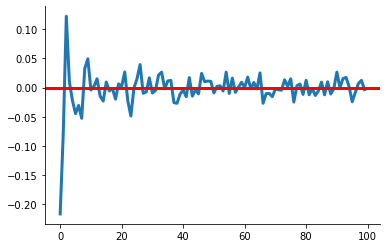

In [5]:
beta, rslt = 0.2, list()

# We iterate over different sample sizes.
grid = np.linspace(100, 1000000, num=100, dtype=int)
for num_agents in grid:

    # We simulate a sample and compute the residuals a
    moment = get_moments(get_sample_1(num_agents, beta), beta)
    rslt.append(moment)

ax = plt.plot(rslt)
plt.axhline(y=0, color="r")

### How does a GMM estimation look like?

In [7]:
df = get_sample_1(num_agents=10000, beta=7)


def criterion_function_gmm(beta, df):
    moments = get_moments(df, beta)
    # Where is weighting matrix?
    return np.square(np.mean(moments))


rslt = minimize(criterion_function_gmm, 0.0, args=(df,), method="BFGS")
rslt

      fun: 5.510400060594885e-13
 hess_inv: array([[5.03694767e-05]])
      jac: array([-5.57720085e-11])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([7.00055904])

### How does an OLS estimation look like?

In [8]:
rslt = smf.ols("Y ~ X", data=df).fit()
print("OLS Estimate ", "{:5.7f}".format(rslt.params[1]))

OLS Estimate  7.0005490


### How does a standard MLE estimation look like?

In [9]:
def get_residuals(df, beta):
    residuals = df["Y"] - (1 + beta * df["X"])
    return residuals


def criterion_function_mle(beta, df):
    residuals = get_residuals(df, beta)
    rslt = np.clip(np.log(norm.pdf(residuals)), -10e6, None)
    return -np.mean(rslt)


rslt = minimize(criterion_function_mle, 0.0, args=(df,), method="Powell")
rslt

/home/peisenha/local/anaconda3/envs/teaching-microeconometrics/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


   direc: array([[1.]])
     fun: 1.4215364807667554
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 2
  status: 0
 success: True
       x: array([7.00055905])

### Example 2

In [11]:
def get_sample_2(num_agents, beta, seed=123):

    # Setup of sample simulation
    random_sampling = partial(np.random.normal, size=num_agents)
    np.random.seed(seed)

    # Create canvas for data frame
    index = pd.Index(range(num_agents), name="Identifier")
    columns = ["Y", "X", "Z1", "Z2"]
    df = pd.DataFrame(columns=columns, index=index)

    for label in ["Z1", "Z2"]:
        df[label] = random_sampling(scale=10)
    C = random_sampling(scale=10)

    df["X"] = C + df[["Z1", "Z2"]].sum(axis=1) + random_sampling()
    U = C + random_sampling()

    df["Y"] = 1 + beta * df["X"] + U

    return df


df = get_sample_2(num_agents=10000, beta=7)

### How does an OLS estimate look like?

In [12]:
rslt = smf.ols("Y ~ X", data=df).fit()
print("OLS Estimate ", "{:5.3f}".format(rslt.params[1]))

OLS Estimate  7.325


In [13]:
rslt = IV2SLS.from_formula("Y ~ 1 + [X ~ Z1 + Z2]", df).fit()
print("IV Estimate ", "{:5.3f}".format(rslt.params[1]))

IV Estimate  6.985


### How does a GMM estimation look like?

In [14]:
def get_moments(df, beta):
    residuals = df["Y"] - (1 + beta * df["X"])

    moments = list()
    for label in ["Z1", "Z2"]:
        moments.append(np.mean(df[label] * residuals))

    return moments


def criterion_function_gmm(beta, df, weighing_matrix=np.identity(2)):
    moments = get_moments(df, beta)
    rslt = np.dot(np.dot(moments, weighing_matrix), moments)
    return rslt


rslt = minimize(criterion_function_gmm, 0.0, args=(df), method="Powell")
print("GMM Estimate ", list(map("{:5.3f}".format, rslt.x)))

GMM Estimate  ['6.985']


## References
- Davidson, R., and  MacKinnon, J. G. (2003). [*Econometric theory and methods*](https://global.oup.com/ushe/product/econometric-theory-and-methods-9780195123722?cc=pt&lang=en&). New York: Oxford University Press.
- Hall, A. A. (2005). [*Generalized method of moments*](https://global.oup.com/academic/product/generalized-method-of-moments-9780198775201?cc=pt&lang=en&). New York: Oxford University Press.
- Whitney Newey. Course materials for 14.385 Nonlinear Econometric Analysis, Fall 2007. [MIT OpenCourseWare](http://ocw.mit.edu), Massachusetts AInstitute of Technology